# Module 2 Graded Quiz

1. Use the EDHEC Hedge Fund Indices data set that we used in the lab assignment as well as in the previous week’s assignments. Load them into Python and perform the following analysis based on data since 2000 (including all of 2000): What was the Monthly Parametric Gaussian VaR at the 1% level (as a +ve number) of the Distressed Securities strategy?

In [1]:
import pandas as pd
import numpy as np
import edhec_risk_kit_111 as erk
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#Load dataset
hfi = erk.get_hfi_returns()
#Calculate Gaussian VaR at 1%
erk.var_gaussian(hfi['2000':], level = 1).take([2])

Distressed Securities    0.03143
dtype: float64

2. Use the same data set at the previous question. What was the 1% VaR for the same strategy after applying the Cornish-Fisher Adjustment?

In [3]:
#Calculate Gaussian VaR modified with Cornish-Fischer at 1%
erk.var_gaussian(hfi['2000':], level = 1, modified=True).take([2])

Distressed Securities    0.049669
dtype: float64

3. Use the same dataset as the previous question. What was the Monthly Historic VaR at the 1% level (as a +ve number) of the Distressed Securities strategy?

In [4]:
erk.var_historic(hfi['2000':], level=1).take([2])

Distressed Securities    0.042642
dtype: float64

4. Next, load the 30 industry return data using the erk.get_ind_returns() function that we developed during the lab sessions. For purposes of the remaining questions, use data during the 5 year period 2013-2017 (both inclusive) to estimate the expected returns as well as the covariance matrix. To be able to respond to the questions, you will need to build the MSR, EW and GMV portfolios consisting of the “Books”, “Steel”, "Oil", and "Mines" industries. Assume the risk free rate over the 5 year period is 10%.
What is the weight of Steel in the EW Portfolio?

In [5]:
#Prepare data
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["2013":"2017"], 12)
cov = ind["2013":"2017"].cov()
ew = np.repeat(0.25, 4)
print('In a EW all parts of the portfolio weights the same since the portfolio consists of 4, Steel weights 0.25')

In a EW all parts of the portfolio weights the same since the portfolio consists of 4, Steel weights 0.25


5. What is the weight of the largest component of the MSR portfolio?

0.056894763673734625 0.04631532064083389


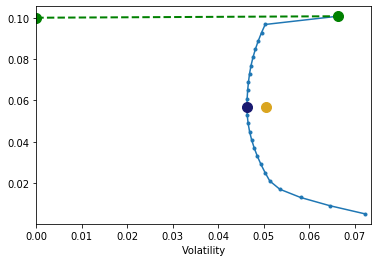

In [6]:
#Make portfolio
l = ['Books', 'Steel', 'Oil', 'Mines']
er[l]
cov.loc[l, l]
erk.plot_ef(25, er[l], cov.loc[l, l], show_cml=True, riskfree_rate=0.1, show_ew=True, show_gmv=True)

In [7]:
#Make Maximum Sharpe Ratio Portfolio
w_msr = erk.msr(0.1, er[l], cov.loc[l,l])
r_msr = erk.portfolio_return(w_msr, er[l])
vol_msr = erk.portfolio_vol(w_msr, cov.loc[l,l])
print(l[1]+': '+str(w_msr[1]))

Steel: 1.0


6. Which of the 4 components has the largest weight in the MSR portfolio?

In [8]:
print('Maximum Sharpe Ratio Portfolio weights')
for i in range(4):
    print(l[i]+': '+str(w_msr[i]))

Maximum Sharpe Ratio Portfolio weights
Books: 0.0
Steel: 1.0
Oil: 0.0
Mines: 3.885780586188048e-16


7. How many of the components of the MSR portfolio have non-zero weights?

In [9]:
print('Does it have non-zero weight?')
for i in range(4):
    if w_msr[i]>0:
        rta='yes'
    else:
        rta='no'
    print(l[i]+': '+rta)

Does it have non-zero weight?
Books: no
Steel: yes
Oil: no
Mines: yes


8. What is the weight of the largest component of the GMV portfolio?
9. Which of the 4 components has the largest weight in the GMV portfolio?

In [10]:
#Make GMV Portfolio
w_gmv = erk.gmv(cov.loc[l, l])
r_gmv = erk.portfolio_return(w_gmv, er[l])
vol_gmv = erk.portfolio_vol(w_gmv, cov.loc[l, l])
print('GMV Portfolio weights')
for i in range(len(er[l])):
    print(l[i]+': '+str(w_gmv[i]))


GMV Portfolio weights
Books: 0.4770248819774167
Steel: 0.0
Oil: 0.4341120072099913
Mines: 0.08886311081259204


10. How many of the components of the GMV portfolio have non-zero weights?

In [11]:
print('Does it have non-zero weight?')
for i in range(4):
    if w_gmv[i]>0:
        rta='yes'
    else:
        rta='no'
    print(l[i]+': '+rta)

Does it have non-zero weight?
Books: yes
Steel: no
Oil: yes
Mines: yes


11. Assume two different investors invested in the GMV and MSR portfolios at the start of 2018 using the weights we just computed. Compute the annualized volatility of these two portfolios over the next 12 months of 2018? (Hint: Use the portfolio_vol code we developed in the lab and use ind[“2018”][l].cov() to compute the covariance matrix for 2018, assuming that the variable ind holds the industry returns and the variable l holds the list of industry portfolios you are willing to hold. Don’t forget to annualize the volatility)
What would be the annualized volatility over 2018 using the weights of the MSR portfolio?

In [12]:
#Get the data of 2018
ind = erk.get_ind_returns()
er2018 = erk.annualize_rets(ind['2018'], 12)
cov2018 = ind['2018'].cov()

#Get volatility of MSR Portfolio using weights of previous exercise
vol_msr2018 = erk.portfolio_vol(w_msr, cov2018.loc[l,l])
print('MRS Volatility: {}'.format(vol_msr2018))
#Calculate the annualized volatility of MSR portfolio
MSR_ann_vol = vol_msr2018*(12**0.5)
print('Annualized volatility MSR: {}'.format(MSR_ann_vol*100))

MRS Volatility: 0.06346230747220724
Annualized volatility MSR: 21.983988181484186


12. What would be the annualized volatility over 2018 using the weights of the GMV portfolio? (Reminder and Hint: Use the portfolio_vol code we developed in the lab and use ind[“2018”][l].cov() to compute the covariance matrix for 2018, assuming that the variable ind holds the industry returns and the variable l holds the list of industry portfolios you are willing to hold. Don’t forget to annualize the volatility)

In [13]:
#Get volatility of GMV Portfolio using weights of previous exercise
vol_gmv2018 = erk.portfolio_vol(w_gmv, cov2018.loc[l, l])
print('GMV Volatility: {}'.format(vol_gmv2018))
#Calculate the annualized volatility of GMV portfolio
GMV_ann_vol = vol_gmv2018*(12**0.5)
print('Annualized volatility GMV: {}'.format(GMV_ann_vol*100))

GMV Volatility: 0.05477245321399671
Annualized volatility GMV: 18.973734364366308
